In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import string
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [6]:
# IMPORT e PULIZIA

dataset_originale = pd.read_csv("dataset_zk.csv")

dataset_originale

,likesCount,timestamp,commentsCount,videoViewCount,videoDuration
0,699251,2023-11-29T16:31:09.000Z,1489,7951694.0,13.481
1,348654,2023-12-04T17:55:13.000Z,1063,3175143.0,15.782
2,405155,2023-12-19T18:52:58.000Z,853,4059328.0,24.401
3,412694,2023-12-14T22:56:07.000Z,887,4484755.0,22.724
4,2098501,2020-03-13T16:20:24.000Z,13789,17265178.0,14.133
...,...,...,...,...,...
1137,12821,2012-01-28T04:04:26.000Z,270,NaN,NaN
1138,4459,2012-04-23T22:07:05.000Z,99,NaN,NaN
1139,4827,2012-01-30T06:51:49.000Z,54,NaN,NaN
1140,13886,2012-01-28T04:03:15.000Z,431,NaN,NaN


In [7]:
dataset_pulito = (dataset_originale[(dataset_originale["videoViewCount"] != 0) & 
                 (dataset_originale['likesCount'] != 0) & (dataset_originale['timestamp'] != 0) & 
                     (dataset_originale['commentsCount'] != 0) & 
                     (dataset_originale['videoDuration'] != 0)]).dropna()

dataset_pulito["rapporto_like_visual"] = dataset_pulito["likesCount"]/dataset_pulito["videoViewCount"]

dataset_pulito["rapporto_comm_visual"] = dataset_pulito["commentsCount"]/dataset_pulito["videoViewCount"]
dataset_pulito

,likesCount,timestamp,commentsCount,videoViewCount,videoDuration,rapporto_like_visual,rapporto_comm_visual
0,699251,2023-11-29T16:31:09.000Z,1489,7951694.0,13.481,0.087937,0.000187
1,348654,2023-12-04T17:55:13.000Z,1063,3175143.0,15.782,0.109807,0.000335
2,405155,2023-12-19T18:52:58.000Z,853,4059328.0,24.401,0.099808,0.000210
3,412694,2023-12-14T22:56:07.000Z,887,4484755.0,22.724,0.092022,0.000198
4,2098501,2020-03-13T16:20:24.000Z,13789,17265178.0,14.133,0.121545,0.000799
...,...,...,...,...,...,...,...
452,1246307,2015-12-30T20:01:47.000Z,26223,11823358.0,13.580,0.105411,0.002218
459,1486328,2015-12-17T00:56:42.000Z,22170,18967912.0,15.015,0.078360,0.001169
464,971877,2015-12-01T13:56:17.000Z,11200,8880493.0,9.642,0.109440,0.001261
470,986724,2015-11-22T13:56:37.000Z,8007,9025154.0,11.077,0.109330,0.000887


In [8]:
z_scores = stats.zscore(dataset_pulito[['likesCount', 'commentsCount', 'videoViewCount', 'videoDuration']])

soglia = 3

maschera_oulier = (z_scores > soglia) | (z_scores < -soglia)

dataset_definitivo = dataset_pulito[~maschera_oulier.any(axis=1)]
dataset_definitivo

,likesCount,timestamp,commentsCount,videoViewCount,videoDuration,rapporto_like_visual,rapporto_comm_visual
0,699251,2023-11-29T16:31:09.000Z,1489,7951694.0,13.481,0.087937,0.000187
1,348654,2023-12-04T17:55:13.000Z,1063,3175143.0,15.782,0.109807,0.000335
2,405155,2023-12-19T18:52:58.000Z,853,4059328.0,24.401,0.099808,0.000210
3,412694,2023-12-14T22:56:07.000Z,887,4484755.0,22.724,0.092022,0.000198
4,2098501,2020-03-13T16:20:24.000Z,13789,17265178.0,14.133,0.121545,0.000799
...,...,...,...,...,...,...,...
452,1246307,2015-12-30T20:01:47.000Z,26223,11823358.0,13.580,0.105411,0.002218
459,1486328,2015-12-17T00:56:42.000Z,22170,18967912.0,15.015,0.078360,0.001169
464,971877,2015-12-01T13:56:17.000Z,11200,8880493.0,9.642,0.109440,0.001261
470,986724,2015-11-22T13:56:37.000Z,8007,9025154.0,11.077,0.109330,0.000887


In [9]:
classi = pd.qcut(dataset_definitivo['rapporto_like_visual'], q=4, labels=False)
dataset_definitivo['categorie'] = classi
dataset_definitivo['categorie'].value_counts()

0    102
1    102
3    102
2    101
Name: categorie, dtype: int64

In [11]:
# ETA

dataset_definitivo['Data'] = pd.to_datetime(dataset_definitivo['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Funzione per calcolare l'età in giorni
def calcola_eta(data):
    data_corrente = datetime.now()
    eta_in_giorni = (data_corrente - data).days
    return int(eta_in_giorni)

# Applico la funzione alla colonna 'timestamp' per ottenere la colonna 'Eta'
dataset_definitivo['Eta'] = dataset_definitivo['Data'].apply(calcola_eta)
dataset_definitivo

,likesCount,timestamp,commentsCount,videoViewCount,videoDuration,rapporto_like_visual,rapporto_comm_visual,categorie,Data,Eta
0,699251,2023-11-29T16:31:09.000Z,1489,7951694.0,13.481,0.087937,0.000187,0,2023-11-29 16:31:09,40
1,348654,2023-12-04T17:55:13.000Z,1063,3175143.0,15.782,0.109807,0.000335,1,2023-12-04 17:55:13,35
2,405155,2023-12-19T18:52:58.000Z,853,4059328.0,24.401,0.099808,0.000210,0,2023-12-19 18:52:58,20
3,412694,2023-12-14T22:56:07.000Z,887,4484755.0,22.724,0.092022,0.000198,0,2023-12-14 22:56:07,25
4,2098501,2020-03-13T16:20:24.000Z,13789,17265178.0,14.133,0.121545,0.000799,2,2020-03-13 16:20:24,1396
...,...,...,...,...,...,...,...,...,...,...
452,1246307,2015-12-30T20:01:47.000Z,26223,11823358.0,13.580,0.105411,0.002218,1,2015-12-30 20:01:47,2931
459,1486328,2015-12-17T00:56:42.000Z,22170,18967912.0,15.015,0.078360,0.001169,0,2015-12-17 00:56:42,2945
464,971877,2015-12-01T13:56:17.000Z,11200,8880493.0,9.642,0.109440,0.001261,1,2015-12-01 13:56:17,2960
470,986724,2015-11-22T13:56:37.000Z,8007,9025154.0,11.077,0.109330,0.000887,1,2015-11-22 13:56:37,2969


In [17]:
istanza_max_visualizzazioni = dataset_definitivo[dataset_definitivo['videoViewCount'] == dataset_definitivo['videoViewCount'].max()]

istanza_min_visualizzazioni = dataset_definitivo[dataset_definitivo['videoViewCount'] == dataset_definitivo['videoViewCount'].min()]

print("Video con il maggior numero di visualizzazioni:")
print(istanza_max_visualizzazioni[['Data', 'videoViewCount', 'likesCount']])

print("\nVideo con il minor numero di visualizzazioni:")
print(istanza_min_visualizzazioni[['Data', 'videoViewCount', 'likesCount']])

Video con il maggior numero di visualizzazioni:
                   Data  videoViewCount  likesCount
134 2021-09-07 19:52:59      29855873.0     2195809

Video con il minor numero di visualizzazioni:
                  Data  videoViewCount  likesCount
48 2023-04-28 16:41:05       2213786.0      225182


In [18]:
media_per_categoria = dataset_definitivo.groupby('categorie').agg({
    'likesCount': 'mean',
    'videoViewCount': 'mean',
    'commentsCount': 'mean',
    'videoDuration': 'mean'
}).reset_index()

print("Media per ogni categoria:")
print(media_per_categoria)

Media per ogni categoria:
   categorie    likesCount  videoViewCount  commentsCount  videoDuration
0          0  7.587555e+05    8.866184e+06    2966.323529      16.383363
1          1  8.644895e+05    7.919567e+06    4387.921569      18.725088
2          2  9.918905e+05    8.079159e+06    4595.316832      20.383228
3          3  1.087429e+06    7.157616e+06    5086.421569      25.238598


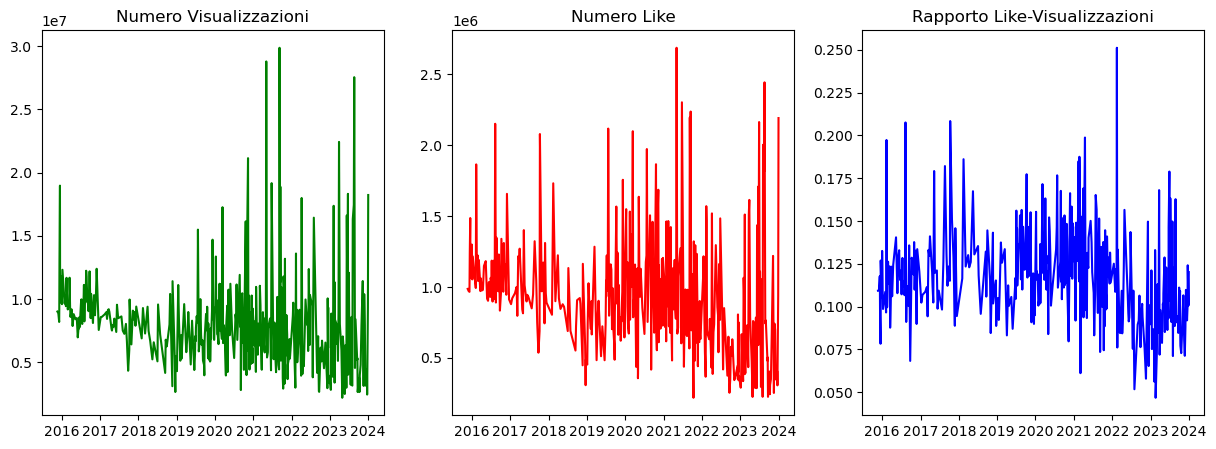

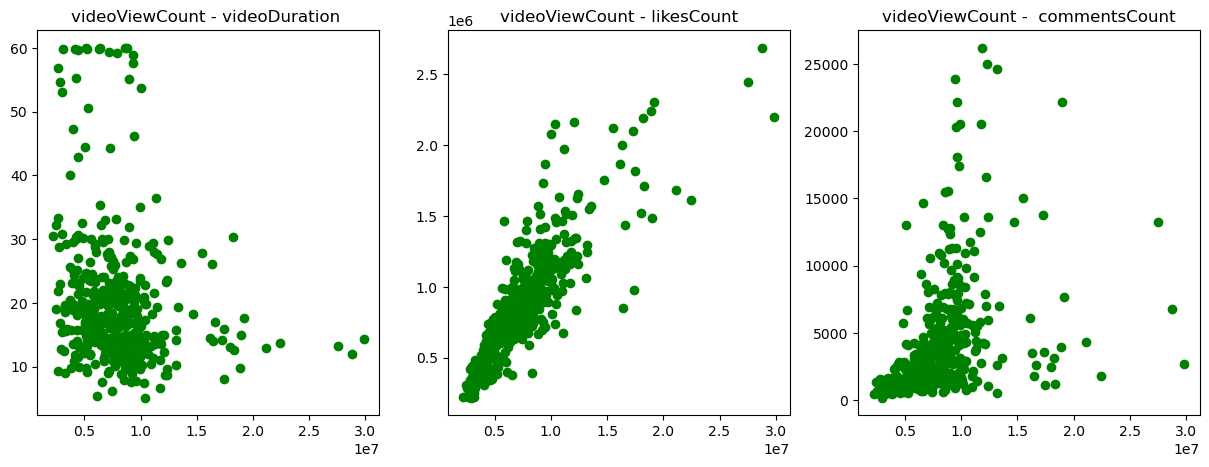

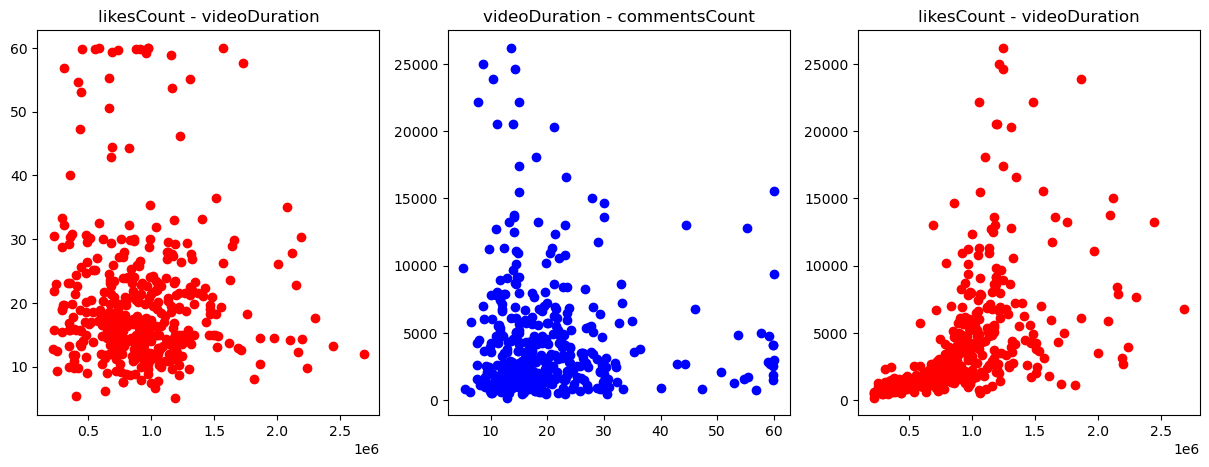

In [19]:
# VISUALIZZAZIONE

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

x, y = zip(*sorted(zip(dataset_definitivo["Data"], dataset_definitivo["videoViewCount"])))
axs[0].plot(x,y, color = "green")
axs[0].set_title("Numero Visualizzazioni")

x, y = zip(*sorted(zip(dataset_definitivo["Data"], dataset_definitivo["likesCount"])))
axs[1].plot(x,y,color = "red")
axs[1].set_title("Numero Like")

x, y = zip(*sorted(zip(dataset_definitivo["Data"], dataset_definitivo["rapporto_like_visual"])))
axs[2].plot(x,y, color = "blue")
axs[2].set_title("Rapporto Like-Visualizzazioni")


plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(dataset_definitivo["videoViewCount"], dataset_definitivo["videoDuration"], color = "green")
axs[0].set_title("videoViewCount - videoDuration ")

axs[1].scatter(dataset_definitivo["videoViewCount"], dataset_definitivo["likesCount"], color = "green")
axs[1].set_title("videoViewCount - likesCount")

axs[2].scatter(dataset_definitivo["videoViewCount"], dataset_definitivo["commentsCount"], color = "green")
axs[2].set_title("videoViewCount -  commentsCount")



plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(dataset_definitivo["likesCount"], dataset_definitivo["videoDuration"], color = "red")
axs[0].set_title("likesCount - videoDuration")

axs[1].scatter(dataset_definitivo["videoDuration"], dataset_definitivo["commentsCount"], color = "blue")
axs[1].set_title("videoDuration - commentsCount")

axs[2].scatter(dataset_definitivo["likesCount"], dataset_definitivo["commentsCount"], color = "red")
axs[2].set_title("likesCount - videoDuration")


plt.show()


In [21]:
target = dataset_definitivo["categorie"]
features = dataset_definitivo[['rapporto_comm_visual', 'videoDuration', 'videoViewCount', 'Eta']].values

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=7)


Accuratezza sul training set del modello ottenuto con Naive Bayes: 0.41530054644808745


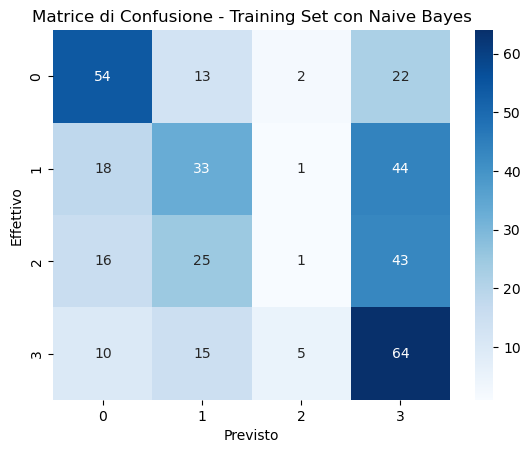

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        91
           1       0.38      0.34      0.36        96
           2       0.11      0.01      0.02        85
           3       0.37      0.68      0.48        94

    accuracy                           0.42       366
   macro avg       0.35      0.41      0.36       366
weighted avg       0.36      0.42      0.37       366

Accuratezza sul testing set del modello ottenuto con Naive Bayes: 0.24390243902439024


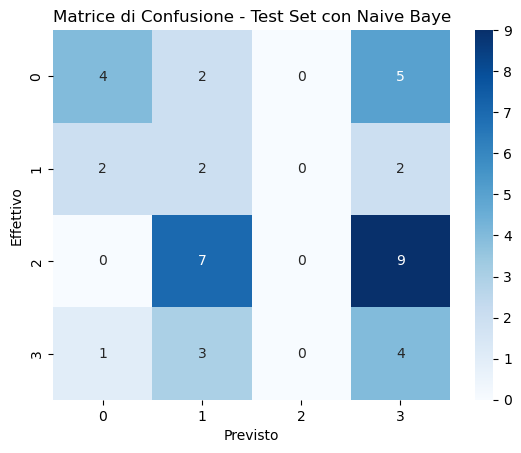

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.14      0.33      0.20         6
           2       0.00      0.00      0.00        16
           3       0.20      0.50      0.29         8

    accuracy                           0.24        41
   macro avg       0.23      0.30      0.23        41
weighted avg       0.21      0.24      0.20        41

Accuratezza media con cross-validation: 0.38316993464052285


/Users/valeriovalentini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/valeriovalentini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/valeriovalentini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

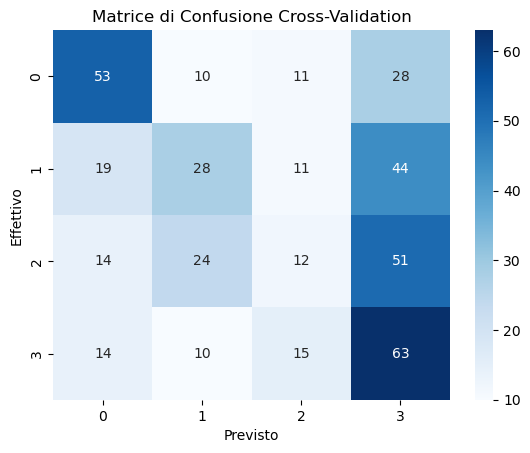

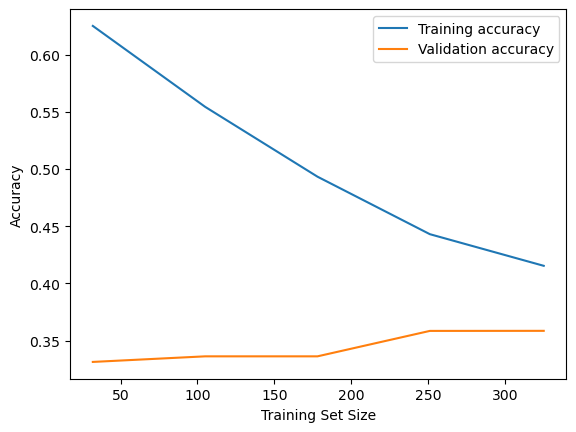

In [24]:
## NAIVE BAYES 


modello_Naive_Bayes = GaussianNB()

modello_Naive_Bayes.fit(features_train, target_train)

predizione_Naive_Bayes_train = modello_Naive_Bayes.predict(features_train)

predizione_Naive_Bayes_test = modello_Naive_Bayes.predict(features_test)

accuracy_train = accuracy_score(target_train, predizione_Naive_Bayes_train)
print(f'Accuratezza sul training set del modello ottenuto con Naive Bayes: {accuracy_train}')


####

Matrice_confusione_Naive_Bayes_train = confusion_matrix(target_train, predizione_Naive_Bayes_train)
Matrice_confusione_Naive_Bayes_test = confusion_matrix(target_test, predizione_Naive_Bayes_test)


sns.heatmap(Matrice_confusione_Naive_Bayes_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Training Set con Naive Bayes')

plt.show()

print(classification_report(target_train, predizione_Naive_Bayes_train))


accuracy_test = accuracy_score(target_test, predizione_Naive_Bayes_test)
print(f'Accuratezza sul testing set del modello ottenuto con Naive Bayes: {accuracy_test}')

sns.heatmap(Matrice_confusione_Naive_Bayes_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Test Set con Naive Baye')

plt.show()

print(classification_report(target_test, predizione_Naive_Bayes_test))


### 

Cross_Validation_Naive_Bayes = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

predizioni_cv_Naive_Bayes = cross_val_predict(modello_Naive_Bayes, features, target, cv=Cross_Validation_Naive_Bayes)

Score_cv_Naive_Bayes = cross_val_score(modello_Naive_Bayes, features, target, cv=Cross_Validation_Naive_Bayes, scoring='accuracy')

print(f'Accuratezza media con cross-validation: {Score_cv_Naive_Bayes.mean()}')


matrice_confusione_Cross_Validation_Naive_Bayes = confusion_matrix(target, predizioni_cv_Naive_Bayes)

sns.heatmap(matrice_confusione_Cross_Validation_Naive_Bayes, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice di Confusione Cross-Validation")
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.show()


train_sizes, train_scores, test_scores = learning_curve(modello_Naive_Bayes, features, target, cv=5, scoring='accuracy')

train_accuracy_mean = train_scores.mean(axis=1)
test_accuracy_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_accuracy_mean, label='Training accuracy')
plt.plot(train_sizes, test_accuracy_mean, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Accuratezza sul training set del modello ottenuto con Random Forest: 0.7896174863387978


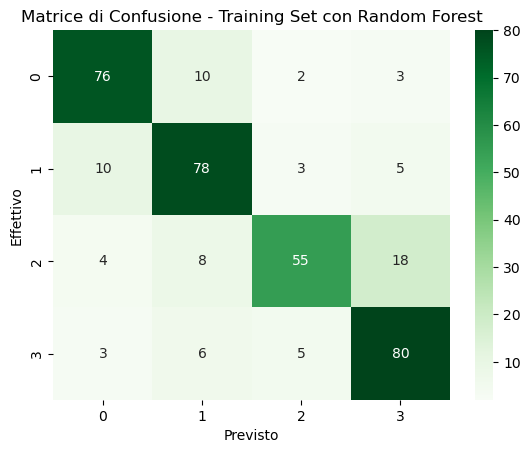

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.76      0.81      0.79        96
           2       0.85      0.65      0.73        85
           3       0.75      0.85      0.80        94

    accuracy                           0.79       366
   macro avg       0.80      0.79      0.79       366
weighted avg       0.79      0.79      0.79       366

Accuratezza sul testing set del modello ottenuto con Random Forest: 0.4146341463414634


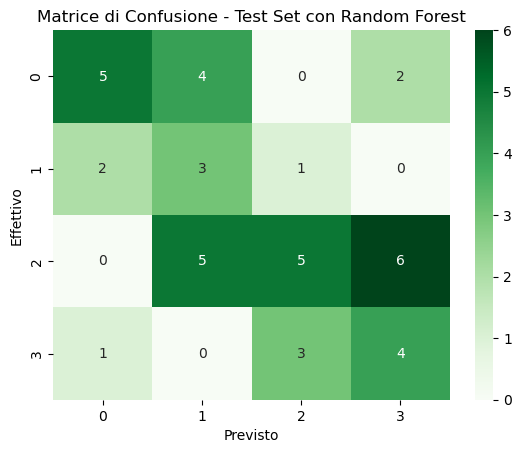

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.25      0.50      0.33         6
           2       0.56      0.31      0.40        16
           3       0.33      0.50      0.40         8

    accuracy                           0.41        41
   macro avg       0.44      0.44      0.41        41
weighted avg       0.49      0.41      0.42        41

Accuratezza media con cross-validation Random Forest: 0.5135620915032679


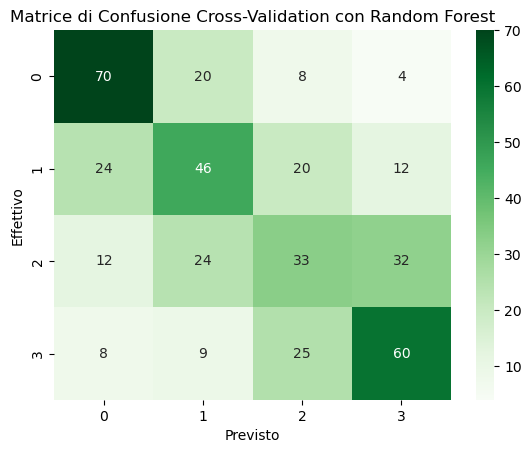

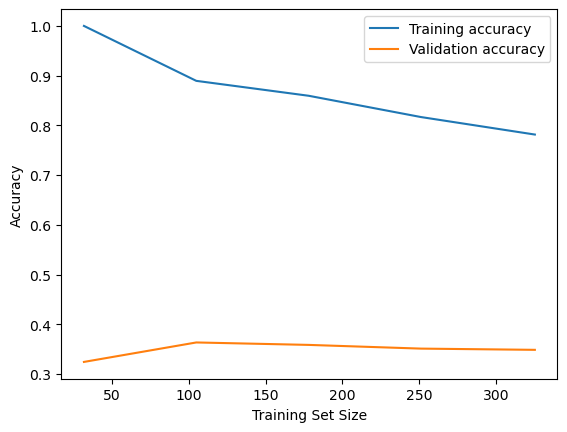

In [26]:
## BAGGING - Random Forest

modello_Random_Forest = RandomForestClassifier(random_state=7, max_depth=5, n_estimators=100, min_samples_split=2, min_samples_leaf=1)
modello_Random_Forest.fit(features_train, target_train)

predizione_Random_Forest_train = modello_Random_Forest.predict(features_train)

predizione_Random_Forest_test = modello_Random_Forest.predict(features_test)

accuracy_train_RF = accuracy_score(target_train, predizione_Random_Forest_train)
print(f'Accuratezza sul training set del modello ottenuto con Random Forest: {accuracy_train_RF}')

Matrice_confusione_RF_train = confusion_matrix(target_train, predizione_Random_Forest_train)
sns.heatmap(Matrice_confusione_RF_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Training Set con Random Forest')
plt.show()
print(classification_report(target_train, predizione_Random_Forest_train))

accuracy_test_RF = accuracy_score(target_test, predizione_Random_Forest_test)
print(f'Accuratezza sul testing set del modello ottenuto con Random Forest: {accuracy_test_RF}')

Matrice_confusione_RF_test = confusion_matrix(target_test, predizione_Random_Forest_test)
sns.heatmap(Matrice_confusione_RF_test, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Test Set con Random Forest')
plt.show()
print(classification_report(target_test, predizione_Random_Forest_test))

Cross_Validation_RF = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
predizioni_cv_RF = cross_val_predict(modello_Random_Forest, features, target, cv=Cross_Validation_RF)

Score_cv_RF = cross_val_score(modello_Random_Forest, features, target, cv=Cross_Validation_RF, scoring='accuracy')
print(f'Accuratezza media con cross-validation Random Forest: {Score_cv_RF.mean()}')

matrice_confusione_Cross_Validation_RF = confusion_matrix(target, predizioni_cv_RF)
sns.heatmap(matrice_confusione_Cross_Validation_RF, annot=True, fmt="d", cmap="Greens")
plt.title("Matrice di Confusione Cross-Validation con Random Forest")
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.show()

train_sizes, train_scores, test_scores = learning_curve(modello_Random_Forest, features, target, cv=5, scoring='accuracy')

train_accuracy_mean = train_scores.mean(axis=1)
test_accuracy_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_accuracy_mean, label='Training accuracy')
plt.plot(train_sizes, test_accuracy_mean, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuratezza sul training set del modello ottenuto con AdaBoost: 0.5491803278688525


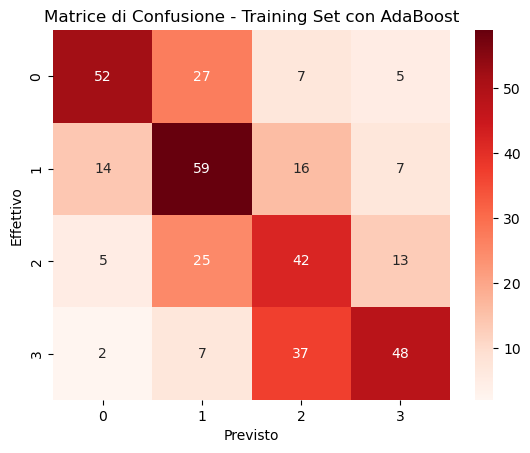

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        91
           1       0.50      0.61      0.55        96
           2       0.41      0.49      0.45        85
           3       0.66      0.51      0.57        94

    accuracy                           0.55       366
   macro avg       0.57      0.55      0.55       366
weighted avg       0.57      0.55      0.55       366

Accuratezza sul testing set del modello ottenuto con AdaBoost: 0.4146341463414634


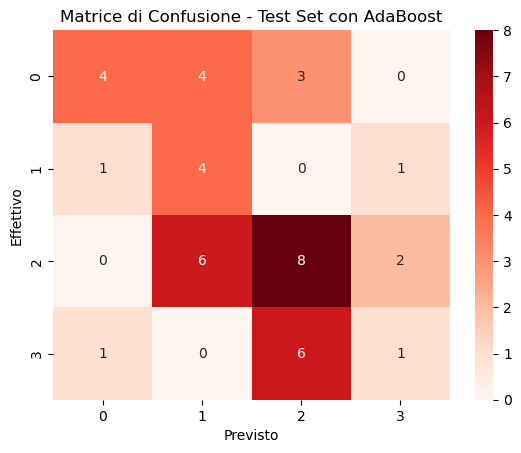

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.29      0.67      0.40         6
           2       0.47      0.50      0.48        16
           3       0.25      0.12      0.17         8

    accuracy                           0.41        41
   macro avg       0.42      0.41      0.38        41
weighted avg       0.45      0.41      0.41        41

Accuratezza media con cross-validation AdaBoost: 0.4152142338416848


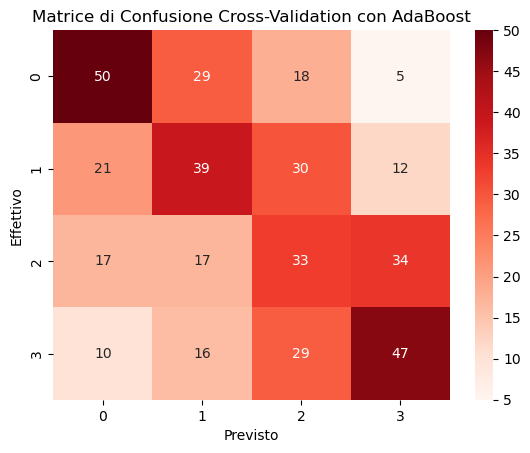

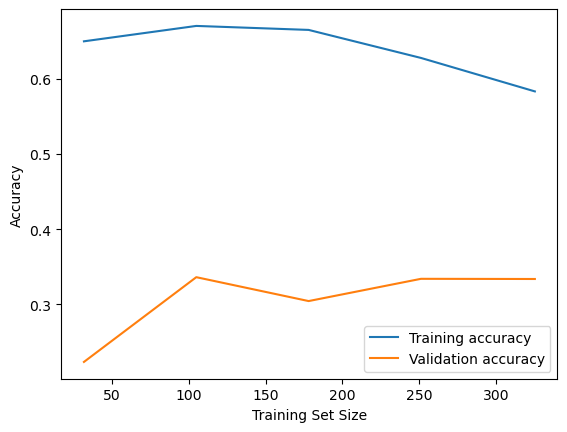

In [29]:
# BOOSTING - Adaboost

modello_AdaBoost = AdaBoostClassifier(random_state=7)
modello_AdaBoost.fit(features_train, target_train)

predizione_AdaBoost_train = modello_AdaBoost.predict(features_train)

predizione_AdaBoost_test = modello_AdaBoost.predict(features_test)

accuracy_train_AdaBoost = accuracy_score(target_train, predizione_AdaBoost_train)
print(f'Accuratezza sul training set del modello ottenuto con AdaBoost: {accuracy_train_AdaBoost}')

Matrice_confusione_AdaBoost_train = confusion_matrix(target_train, predizione_AdaBoost_train)
sns.heatmap(Matrice_confusione_AdaBoost_train, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Training Set con AdaBoost')
plt.show()
print(classification_report(target_train, predizione_AdaBoost_train))

accuracy_test_AdaBoost = accuracy_score(target_test, predizione_AdaBoost_test)
print(f'Accuratezza sul testing set del modello ottenuto con AdaBoost: {accuracy_test_AdaBoost}')

Matrice_confusione_AdaBoost_test = confusion_matrix(target_test, predizione_AdaBoost_test)
sns.heatmap(Matrice_confusione_AdaBoost_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Test Set con AdaBoost')
plt.show()
print(classification_report(target_test, predizione_AdaBoost_test))

Cross_Validation_AdaBoost = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
predizioni_cv_AdaBoost = cross_val_predict(modello_AdaBoost, features, target, cv=Cross_Validation_AdaBoost)

Score_cv_AdaBoost = cross_val_score(modello_AdaBoost, features, target, cv=Cross_Validation_AdaBoost, scoring='accuracy')
print(f'Accuratezza media con cross-validation AdaBoost: {Score_cv_AdaBoost.mean()}')

matrice_confusione_Cross_Validation_AdaBoost = confusion_matrix(target, predizioni_cv_AdaBoost)
sns.heatmap(matrice_confusione_Cross_Validation_AdaBoost, annot=True, fmt="d", cmap="Reds")
plt.title("Matrice di Confusione Cross-Validation con AdaBoost")
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.show()

train_sizes_AdaBoost, train_scores_AdaBoost, test_scores_AdaBoost = learning_curve(modello_AdaBoost, features, target, cv=5, scoring='accuracy')

train_accuracy_mean_AdaBoost = train_scores_AdaBoost.mean(axis=1)
test_accuracy_mean_AdaBoost = test_scores_AdaBoost.mean(axis=1)

plt.plot(train_sizes_AdaBoost, train_accuracy_mean_AdaBoost, label='Training accuracy')
plt.plot(train_sizes_AdaBoost, test_accuracy_mean_AdaBoost, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Accuratezza sul training set del modello ottenuto con Gradient Boosting: 0.6721311475409836


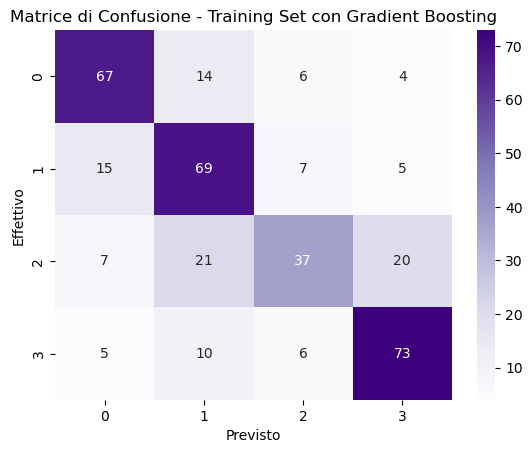

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        91
           1       0.61      0.72      0.66        96
           2       0.66      0.44      0.52        85
           3       0.72      0.78      0.74        94

    accuracy                           0.67       366
   macro avg       0.67      0.67      0.66       366
weighted avg       0.67      0.67      0.67       366

Accuratezza sul testing set del modello ottenuto con Gradient Boosting: 0.34146341463414637


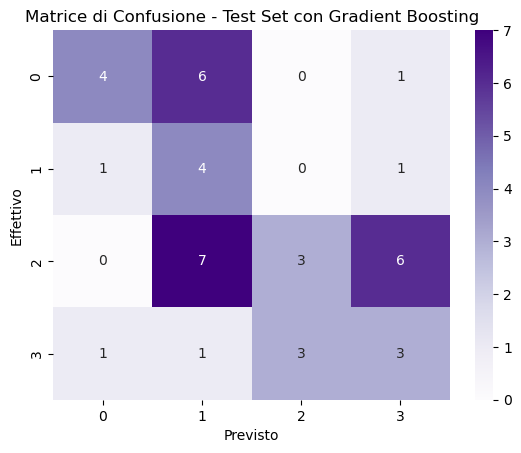

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.22      0.67      0.33         6
           2       0.50      0.19      0.27        16
           3       0.27      0.38      0.32         8

    accuracy                           0.34        41
   macro avg       0.42      0.40      0.35        41
weighted avg       0.46      0.34      0.34        41

Accuratezza media con cross-validation Gradient Boosting: 0.4619825708061002


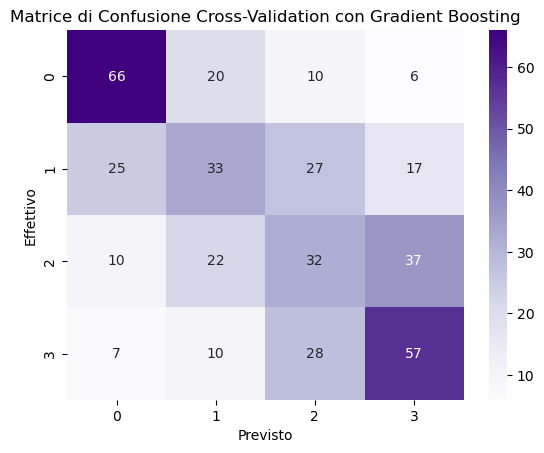

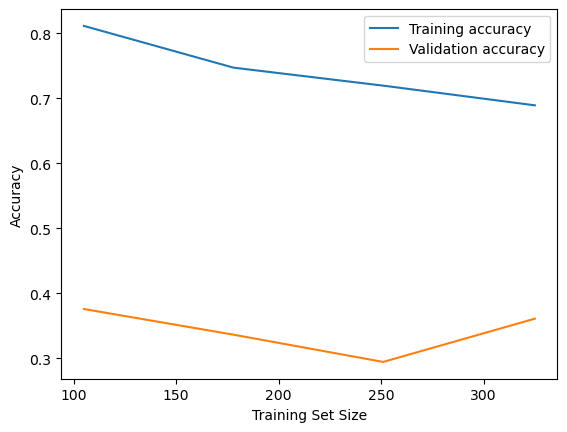

In [30]:
## BOOSTING - Gradient Boosting

modello_Gradient_Boosting = GradientBoostingClassifier(random_state=7, max_depth=1, n_estimators=100, learning_rate=0.1)
modello_Gradient_Boosting.fit(features_train, target_train)

predizione_Gradient_Boosting_train = modello_Gradient_Boosting.predict(features_train)

predizione_Gradient_Boosting_test = modello_Gradient_Boosting.predict(features_test)

accuracy_train_Gradient_Boosting = accuracy_score(target_train, predizione_Gradient_Boosting_train)
print(f'Accuratezza sul training set del modello ottenuto con Gradient Boosting: {accuracy_train_Gradient_Boosting}')

Matrice_confusione_Gradient_Boosting_train = confusion_matrix(target_train, predizione_Gradient_Boosting_train)
sns.heatmap(Matrice_confusione_Gradient_Boosting_train, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Training Set con Gradient Boosting')
plt.show()
print(classification_report(target_train, predizione_Gradient_Boosting_train))

accuracy_test_Gradient_Boosting = accuracy_score(target_test, predizione_Gradient_Boosting_test)
print(f'Accuratezza sul testing set del modello ottenuto con Gradient Boosting: {accuracy_test_Gradient_Boosting}')

Matrice_confusione_Gradient_Boosting_test = confusion_matrix(target_test, predizione_Gradient_Boosting_test)
sns.heatmap(Matrice_confusione_Gradient_Boosting_test, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione - Test Set con Gradient Boosting')
plt.show()
print(classification_report(target_test, predizione_Gradient_Boosting_test))

Cross_Validation_Gradient_Boosting = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
predizioni_cv_Gradient_Boosting = cross_val_predict(modello_Gradient_Boosting, features, target, cv=Cross_Validation_Gradient_Boosting)

Score_cv_Gradient_Boosting = cross_val_score(modello_Gradient_Boosting, features, target, cv=Cross_Validation_Gradient_Boosting, scoring='accuracy')
print(f'Accuratezza media con cross-validation Gradient Boosting: {Score_cv_Gradient_Boosting.mean()}')

matrice_confusione_Cross_Validation_Gradient_Boosting = confusion_matrix(target, predizioni_cv_Gradient_Boosting)
sns.heatmap(matrice_confusione_Cross_Validation_Gradient_Boosting, annot=True, fmt="d", cmap="Purples")
plt.title("Matrice di Confusione Cross-Validation con Gradient Boosting")
plt.xlabel('Previsto')
plt.ylabel('Effettivo')
plt.show()

train_sizes_Gradient_Boosting, train_scores_Gradient_Boosting, test_scores_Gradient_Boosting = learning_curve(modello_Gradient_Boosting, features, target, cv=5, scoring='accuracy')

train_accuracy_mean_Gradient_Boosting = train_scores_Gradient_Boosting.mean(axis=1)
test_accuracy_mean_Gradient_Boosting = test_scores_Gradient_Boosting.mean(axis=1)

plt.plot(train_sizes_Gradient_Boosting, train_accuracy_mean_Gradient_Boosting, label='Training accuracy')
plt.plot(train_sizes_Gradient_Boosting, test_accuracy_mean_Gradient_Boosting, label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Training Set:

R-squared: 0.5832084612620732
MST train: 0.0007567546594073134
MSR train: 0.00044134572046584285
MSE train: 0.0003154089389414699
MAE train: 0.012636838219150256

Test Set:

R-squared: 0.41231720043437414
MST test: 0.000401687463979668
MSR test: 0.000401687463979668
MSE test: 0.00028760796433817843
MAE test: 0.013678957533859398


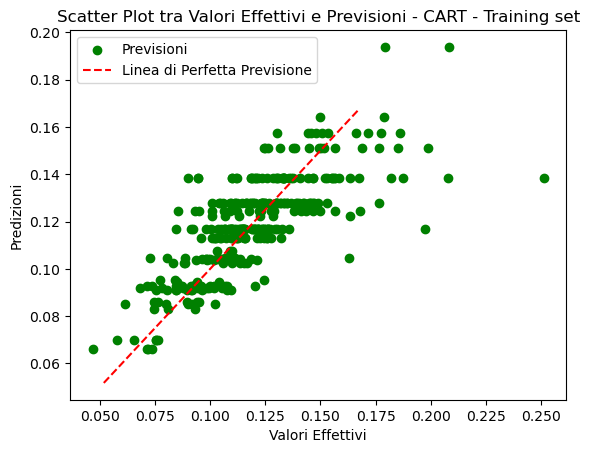

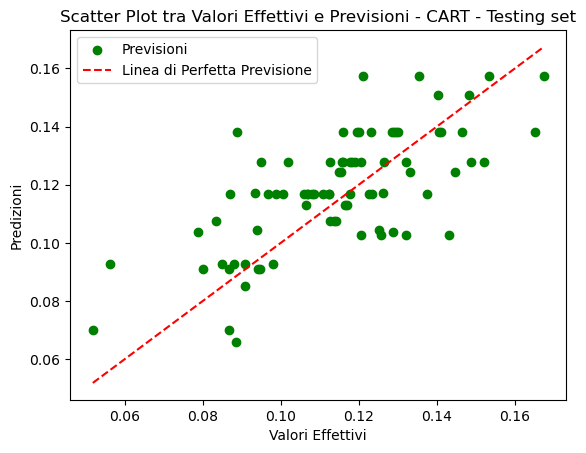

In [33]:
# CART - Regressione


target_regressione = dataset_definitivo["rapporto_like_visual"]

features_train_regressione, features_test_regressione, target_train_regressione, target_test_regressione = train_test_split(features, target_regressione, test_size=0.2, random_state=5)

modello_regressione_CART = DecisionTreeRegressor(random_state=7, max_depth=5, min_samples_split=5, min_samples_leaf=2)

modello_regressione_CART.fit(features_train_regressione, target_train_regressione)

predizione_regressione_CART_train = modello_regressione_CART.predict(features_train_regressione)
predizione_regressione_CART_test = modello_regressione_CART.predict(features_test_regressione)

train_r2 = r2_score(target_train_regressione, predizione_regressione_CART_train)

test_r2 = r2_score(target_test_regressione, predizione_regressione_CART_test)

print("\nTraining Set:")
print(f'\nR-squared: {train_r2}')
print(f'MST train: {((target_train_regressione - target_train_regressione.mean()) ** 2).mean()}')
print(f'MSR train: {((predizione_regressione_CART_train - target_train_regressione.mean()) ** 2).mean()}')
print(f'MSE train: {mean_squared_error(target_train_regressione, predizione_regressione_CART_train)}')
print(f'MAE train: {mean_absolute_error(target_train_regressione, predizione_regressione_CART_train)}')


print("\nTest Set:")
print(f'\nR-squared: {test_r2}')
print(f'MST test: {((predizione_regressione_CART_test - target_test_regressione.mean()) ** 2).mean()}')
print(f'MSR test: {((predizione_regressione_CART_test - target_test_regressione.mean()) ** 2).mean()}')
print(f'MSE test: {mean_squared_error(target_test_regressione, predizione_regressione_CART_test)}')
print(f'MAE test: {mean_absolute_error(target_test_regressione, predizione_regressione_CART_test)}')


plt.scatter(target_train_regressione, predizione_regressione_CART_train, label='Previsioni', color = "green")
plt.plot([min(target_test_regressione), max(target_test_regressione)], [min(target_test_regressione), max(target_test_regressione)], linestyle='--', color='red', label='Linea di Perfetta Previsione')
plt.xlabel('Valori Effettivi')
plt.ylabel('Predizioni')
plt.title('Scatter Plot tra Valori Effettivi e Previsioni - CART - Training set')
plt.legend()
plt.show()

plt.scatter(target_test_regressione, predizione_regressione_CART_test, label='Previsioni', color = "green")
plt.plot([min(target_test_regressione), max(target_test_regressione)], [min(target_test_regressione), max(target_test_regressione)], linestyle='--', color='red', label='Linea di Perfetta Previsione')
plt.xlabel('Valori Effettivi')
plt.ylabel('Predizioni')
plt.title('Scatter Plot tra Valori Effettivi e Previsioni - CART - Testing set')
plt.legend()
plt.show()


Training Set:

R-squared: 0.8356427231100229
MST train: 0.0007567546594073134
MSR train: 0.0004854381550103426
MSE train: 0.00012437813509398815
MAE train: 0.008219415573844657

Test Set:

R-squared: 0.5899061127345968
MST test: 0.00038074396434240043
MSR test: 0.00038074396434240043
MSE test: 0.00020069715872424838
MAE test: 0.011307521576272461


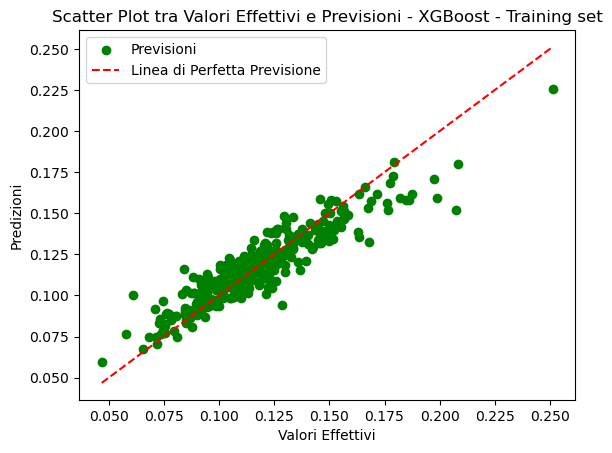

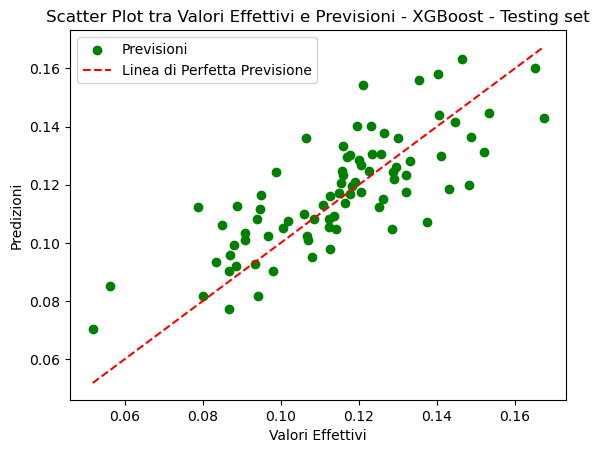

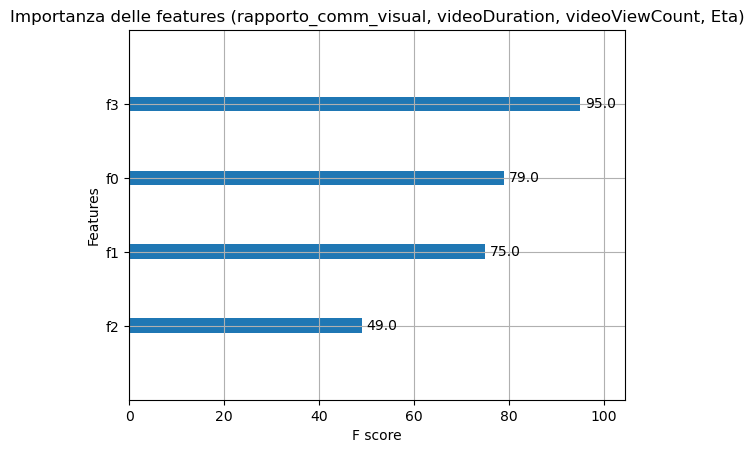

In [34]:
# XGBOOST - Regressione

modello_regressione_XGBoost = XGBRegressor(random_state=7, max_depth=2)
modello_regressione_XGBoost.fit(features_train_regressione, target_train_regressione)

predizione_regressione_XGBoost_train = modello_regressione_XGBoost.predict(features_train_regressione)
predizione_regressione_XGBoost_test = modello_regressione_XGBoost.predict(features_test_regressione)

train_mse_XGBoost = mean_squared_error(target_train_regressione, predizione_regressione_XGBoost_train)
train_r2_XGBoost = r2_score(target_train_regressione, predizione_regressione_XGBoost_train)

test_mse_XGBoost = mean_squared_error(target_test_regressione, predizione_regressione_XGBoost_test)
test_r2_XGBoost = r2_score(target_test_regressione, predizione_regressione_XGBoost_test)

print("\nTraining Set:")
print(f'\nR-squared: {train_r2_XGBoost}')
print(f'MST train: {((target_train_regressione - target_train_regressione.mean()) ** 2).mean()}')
print(f'MSR train: {((predizione_regressione_XGBoost_train - target_train_regressione.mean()) ** 2).mean()}')
print(f'MSE train: {mean_squared_error(target_train_regressione, predizione_regressione_XGBoost_train)}')
print(f'MAE train: {mean_absolute_error(target_train_regressione, predizione_regressione_XGBoost_train)}')


print("\nTest Set:")
print(f'\nR-squared: {test_r2_XGBoost}')
print(f'MST test: {((predizione_regressione_XGBoost_test - target_test_regressione.mean()) ** 2).mean()}')
print(f'MSR test: {((predizione_regressione_XGBoost_test - target_test_regressione.mean()) ** 2).mean()}')
print(f'MSE test: {mean_squared_error(target_test_regressione, predizione_regressione_XGBoost_test)}')
print(f'MAE test: {mean_absolute_error(target_test_regressione, predizione_regressione_XGBoost_test)}')

plt.scatter(target_train_regressione, predizione_regressione_XGBoost_train, label='Previsioni', color="green")
plt.plot([min(target_train_regressione), max(target_train_regressione)], [min(target_train_regressione), max(target_train_regressione)], linestyle='--', color='red', label='Linea di Perfetta Previsione')
plt.xlabel('Valori Effettivi')
plt.ylabel('Predizioni')
plt.title('Scatter Plot tra Valori Effettivi e Previsioni - XGBoost - Training set')
plt.legend()
plt.show()

plt.scatter(target_test_regressione, predizione_regressione_XGBoost_test, label='Previsioni', color="green")
plt.plot([min(target_test_regressione), max(target_test_regressione)], [min(target_test_regressione), max(target_test_regressione)], linestyle='--', color='red', label='Linea di Perfetta Previsione')
plt.xlabel('Valori Effettivi')
plt.ylabel('Predizioni')
plt.title('Scatter Plot tra Valori Effettivi e Previsioni - XGBoost - Testing set')
plt.legend()
plt.show()


importanza_variabili = modello_regressione_XGBoost.feature_importances_

plot_importance(modello_regressione_XGBoost)
plt.ylabel('Features')
plt.title("Importanza delle features (rapporto_comm_visual, videoDuration, videoViewCount, Eta)")
plt.show()
